deBruijn Graphs and DNA Sequencing

Principle: Given a list of equally-sized k-mers, a sequence can be constructed by linking together prefixes and suffixes of length k-1, generated from each k-mer.

In [7]:
# If you don't already have it, install networkx for visualization of the graph
! pip install networkx

In [20]:
# Depdendencies

import networkx as nx
import matplotlib.pyplot as plt
import random

from __future__ import annotations

In [14]:
# Graph Class construction

class Vertice:
    def __init__(self, n_fix):
        self.outbound_edges = []
        self.inbound_edge_count = 0
        self.n_fix = n_fix
    
    def add_edge(self, edge:Edge):
        self.outbound_edges.append(edge)

class Edge:
    def __init__(self, k_mer):
        self.neighbors = []
        self.k_mer = k_mer

    def add_neighbor(self, vertice:Vertice):
        self.neighbors.append(vertice)
        vertice.inbound_edge_count += 1

class Graph:
    def __init__(self):
        self.vertices = []
        self.edges = []
    
    def find_or_insert_vertice(self, new_fix:str) -> Vertice:
        for vertice in self.vertices:
            if vertice.n_fix == new_fix:
                return vertice
        
        new_v = Vertice(new_fix)
        self.vertices.append(new_v)

        return new_v

    def insert_edge(self, prefix:str, suffix:str):
        ''' Keeps a list of all vertice pairs for edge representation, for use with networkx later '''
        self.edges.append((prefix, suffix))
    

    def get_root(self) -> Vertice:
        for vertice in self.vertices:
            if vertice.inbound_edge_count == 0:
                return vertice
        return None

In [54]:
# Sequence Constructor Construction

class SequenceConstructor:

    def graph_from_k_mers(self, k_mers:list)->Graph:
        
        sequence_graph = Graph()

        for k_mer in k_mers:
            prefix = k_mer[:-1]
            suffix = k_mer[1:]

            prefix_node = sequence_graph.find_or_insert_vertice(prefix)
            suffix_node = sequence_graph.find_or_insert_vertice(suffix)

            k_edge = Edge(k_mer)
            k_edge.add_neighbor(suffix_node)

            prefix_node.add_edge(k_edge)

            sequence_graph.insert_edge(prefix, suffix)
        
        return sequence_graph

    def deconstruct_to_reconstruct(self, sequence:str, k)->Graph:
        ''' Specifying k, split the given sequence into kmers and return the graph of the resulting sequence '''
        
        if k < 3:
            print("Invalid k-mer length")
            return
        
        k_mers = [sequence[i:i+k] for i in range(len(sequence)-k)]
        random.shuffle(k_mers) # to keep things interesting
        sequence_graph = self.graph_from_k_mers(k_mers)
        
        return sequence_graph

    def visualize_graph(self, sequence_graph:Graph)->None:
        ''' Use networkx to visualize the graph '''

        # nx graph setup
        G = nx.Graph()
        n_fix_list = [v.n_fix for v in sequence_graph.vertices]
        G.add_nodes_from(n_fix_list)
        G.add_edges_from(sequence_graph.edges)

        # graph drawing
        pos = nx.spring_layout(G, seed=1) # with seed for reproducability 
        nx.draw_networkx_nodes(G, pos=pos)
        nx.draw_networkx_labels(G, pos=pos)
        nx.draw_networkx_edges(G, arrows=True, arrowstyle='->', pos=pos)


AAGCCATCGTGC


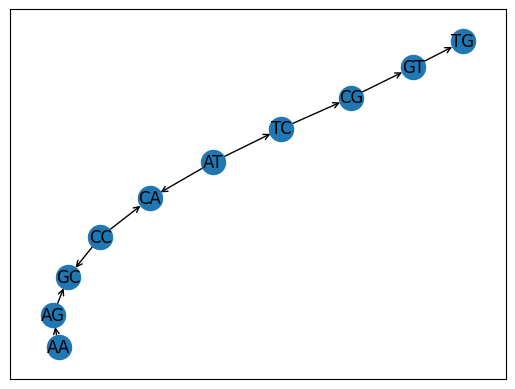

In [57]:
og_sequence = input("Enter data string: ")
print(og_sequence)
k_length = int(input("Enter k: "))

sq = SequenceConstructor()
graph = sq.deconstruct_to_reconstruct(og_sequence, k_length)
sq.visualize_graph(graph)
